In [21]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
H_s, H_jw, mod_H_jw, phi, s, t, vi, vo, va, r1, r2, r3, c1, c2, Hs, w, vt = symbols("H_s H_jw |H_jw| phi s t vi vo va r1 r2 r3 c1 c2 Hs w vt")

eq1 = Eq((va-vi)/r1 + ((va-vo)/r2) + (va/(1/(s*c1))) + ((va)/r3), 0)
eq1

Eq(c1*s*va + va/r3 + (va - vo)/r2 + (va - vi)/r1, 0)

In [23]:
eq2 = Eq(va,-r3*(vo/(1/(s*c2))))
eq2.simplify()

Eq(va, -c2*r3*s*vo)

In [24]:
sol = linsolve([eq1, eq2], (vo,va))
sol

{(-r2*vi/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1), c2*r2*r3*s*vi/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1))}

In [25]:
Vo = sol.args[0][0]

Hs = Vo/vi 
Eq(H_s, Hs)

Eq(H_s, -r2/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1))

In [26]:
Hs_subs = Hs.subs({c1:100e-9, c2: 10e-9, r1:47e3, r2:470e3,r3:470e3})
Eq(H_s, Hs_subs).simplify()

Eq(H_s, -470000.0/(10.3823*s**2 + 2650.8*s + 47000.0))

In [27]:
# Substituindo s = jw

Hjw = Hs.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, -r2/(-c1*c2*r1*r2*r3*w**2 + I*c2*r1*r2*w + I*c2*r1*r3*w + I*c2*r2*r3*w + r1))

In [28]:
Eq(H_jw,Hjw).subs({c1:100e-9, c2: 10e-9, r1:47e3, r2:470e3,r3:470e3})

Eq(H_jw, -470000.0/(-10.3823*w**2 + 2650.8*I*w + 47000.0))

In [29]:
#Calculando Modulo
mod_Hjw = Eq(mod_H_jw,abs(Hjw))
mod_Hjw

Eq(|H_jw|, Abs(r2/(-c1*c2*r1*r2*r3*w**2 + I*c2*r1*r2*w + I*c2*r1*r3*w + I*c2*r2*r3*w + r1)))

In [30]:
#resposta em radiano, se liga
Eq(phi,deg(arg(Hjw)))

Eq(phi, 180*arg(-r2/(-c1*c2*r1*r2*r3*w**2 + I*c2*r1*r2*w + I*c2*r1*r3*w + I*c2*r2*r3*w + r1))/pi)

In [31]:

mod_Hjw_subs = mod_Hjw.subs({c1:100e-9, c2: 10e-9, r1:47e3, r2:470e3,r3:470e3})
mod_Hjw_subs


Eq(|H_jw|, 470000.0/Abs(-10.3823*w**2 + 2650.8*I*w + 47000.0))

In [32]:
mod_H_zero = mod_Hjw_subs.subs(w,0)
mod_H_zero

Eq(|H_jw|, 10.0)

In [33]:
float((10)/(sqrt(2)))

7.0710678118654755

In [34]:
Hjw_subs = Hjw.subs({c1:100e-9, c2: 10e-9, r1:47e3, r2:470e3,r3:470e3})
Hjw_denom = denom(Hjw_subs)
Hjw_polos = solve(Hjw_denom, w)
Hjw_polos
Eq(H_jw,Hjw_subs)

Eq(H_jw, -470000.0/(-10.3823*w**2 + 2650.8*I*w + 47000.0))

In [35]:
Hjw_polos

[19.1697975831322*I, 236.149351353038*I]

In [36]:
#resposta em radiano, se liga
Fase = Eq(phi,deg(arg(Hjw_subs)))
Fase

Eq(phi, 180*arg(-1/(-10.3823*w**2 + 2650.8*I*w + 47000.0))/pi)

In [37]:
#freq 40Hz
Mod1=abs(Hjw_subs)
Arg1=deg(arg(Hjw_subs))
float(Mod1.subs(w,2*pi*40)), float(Arg1.subs(w,2*pi*40))

(0.5207813744256246, 47.578360963090866)

In [38]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = abs(Hjw_subs)
        Arg = deg(arg(Hjw_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))
        Periodo = 1 / freq
        Mod_Hjw = Yo[i] / Uo[i] 
        Phase = 360*cursor_diff_2_1[i]/Periodo

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
            'Período (s)': Periodo,
            'Yo': Yo[i],
            'Uo': Uo[i],
            '|H(jω)| LTSpice': abs(Mod_Hjw),
            "Fase LTSpice (Deg)": Phase
        })

    return resultados

# Lista de frequencias em Hz
# frequencias = [0.01, 0.1, 1, 10, 100, 1000]
frequencias = np.logspace(-2, 5, num=100)
Yo = np.logspace(-2, 5, num=100)
Uo = np.logspace(-2, 5, num=100)
cursor_diff_2_1 = np.logspace(-2, 5, num=100)

resultados = calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1)
df = pd.DataFrame(resultados)
df

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg),Período (s),Yo,Uo,|H(jω)| LTSpice,Fase LTSpice (Deg)
0,0.010000,9.999946e+00,179.796961,100.000000,0.010000,0.010000,1.0,3.600000e-02
1,0.011768,9.999925e+00,179.761061,84.975344,0.011768,0.011768,1.0,4.985591e-02
2,0.013849,9.999896e+00,179.718814,72.208090,0.013849,0.013849,1.0,6.904477e-02
3,0.016298,9.999856e+00,179.669098,61.359073,0.016298,0.016298,1.0,9.561916e-02
4,0.019179,9.999801e+00,179.610592,52.140083,0.019179,0.019179,1.0,1.324217e-01
...,...,...,...,...,...,...,...,...
95,52140.082880,4.217946e-07,0.044653,0.000019,52140.082880,52140.082880,1.0,9.786918e+11
96,61359.072734,3.045698e-07,0.037944,0.000016,61359.072734,61359.072734,1.0,1.355377e+12
97,72208.090184,2.199241e-07,0.032243,0.000014,72208.090184,72208.090184,1.0,1.877043e+12
98,84975.343591,1.588030e-07,0.027399,0.000012,84975.343591,84975.343591,1.0,2.599491e+12


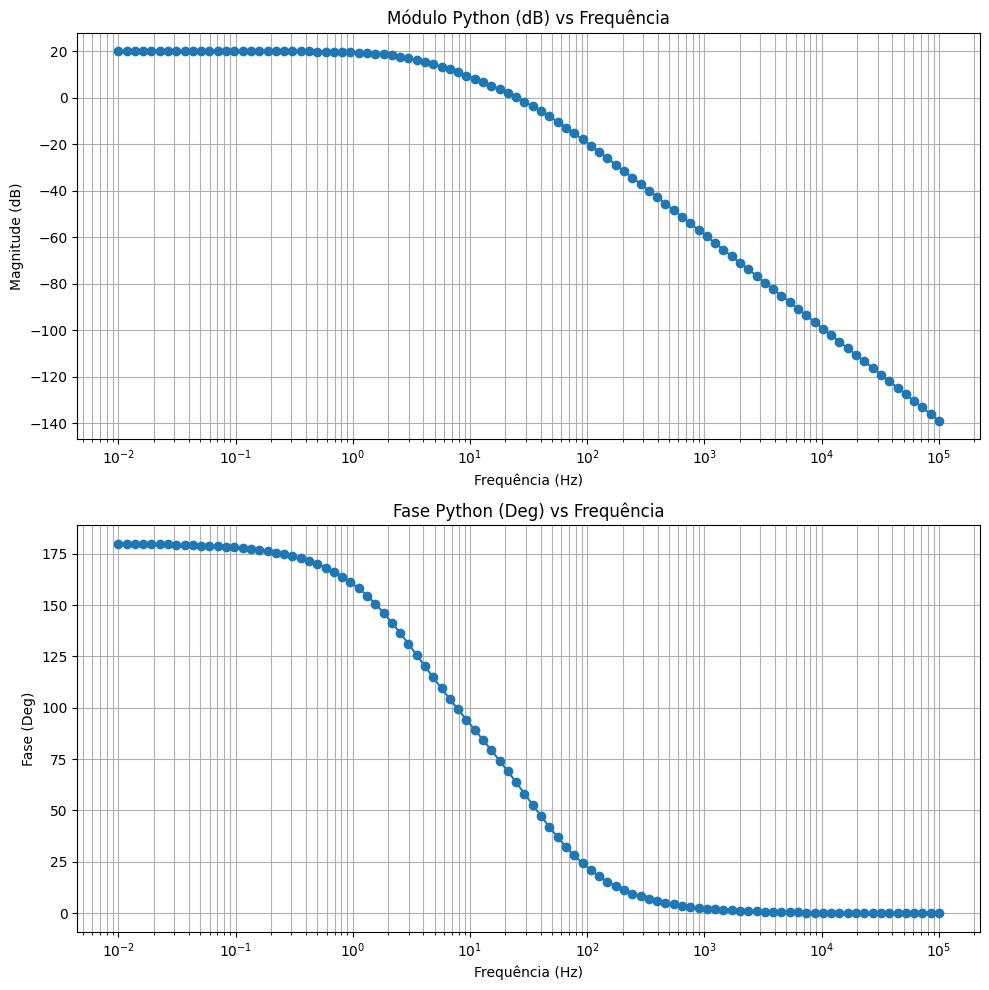

In [39]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-')
axs[0].set_title('Módulo Python (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Python (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


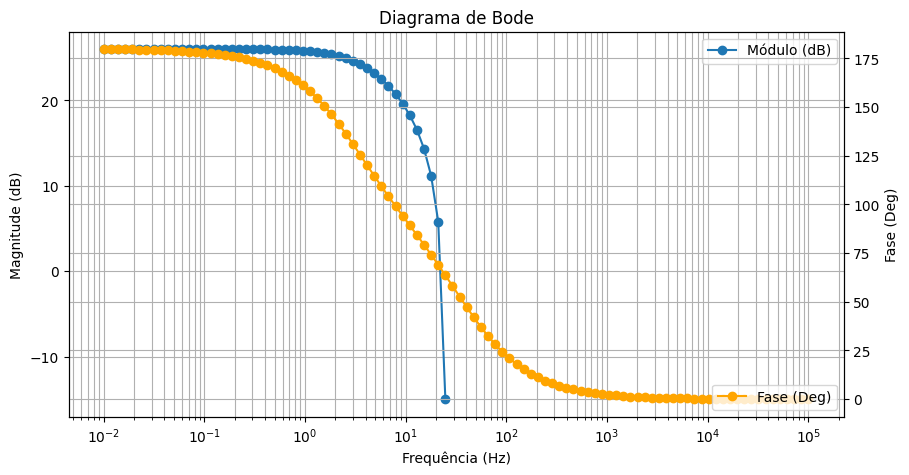

In [40]:
# Convertendo módulo para dB
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, ax1 = plt.subplots(figsize=(10, 5))

# Módulo em dB
ax1.semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-', label='Módulo (dB)')
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which="both", ls="-")
ax1.legend(loc='upper right')

# Fase em graus
ax2 = ax1.twinx()
ax2.semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-', color='orange', label='Fase (Deg)')
ax2.set_ylabel('Fase (Deg)')
ax2.legend(loc='lower right')

plt.title('Diagrama de Bode')
plt.grid(True, which="both", ls="-")
plt.show()

In [41]:
10 * np.log10(df['Módulo_Python'])

0     14.153170
1     14.153168
2     14.153167
3     14.153164
4     14.153161
        ...    
95          NaN
96          NaN
97          NaN
98          NaN
99          NaN
Name: Módulo_Python, Length: 100, dtype: float64

In [42]:
Hs_sub_deg = Hs_subs*0.8*(1/s)

Hs_sub_deg

-376000.0/(s*(10.3823*s**2 + 2650.8*s + 47000.0))

In [43]:
#Transformada inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)
vt

-376000.0*(-2.5036102358066e-5*exp(-127.659574468085*t)*sinh(108.489776884953*t) - 2.12765957446808e-5*exp(-127.659574468085*t)*cosh(108.489776884953*t))*Heaviside(t) - 8.0*Heaviside(t)

In [44]:
Eq(H_s, Hs_subs)

Eq(H_s, -470000.0/(10.3823*s**2 + 2650.8*s + 47000.0))

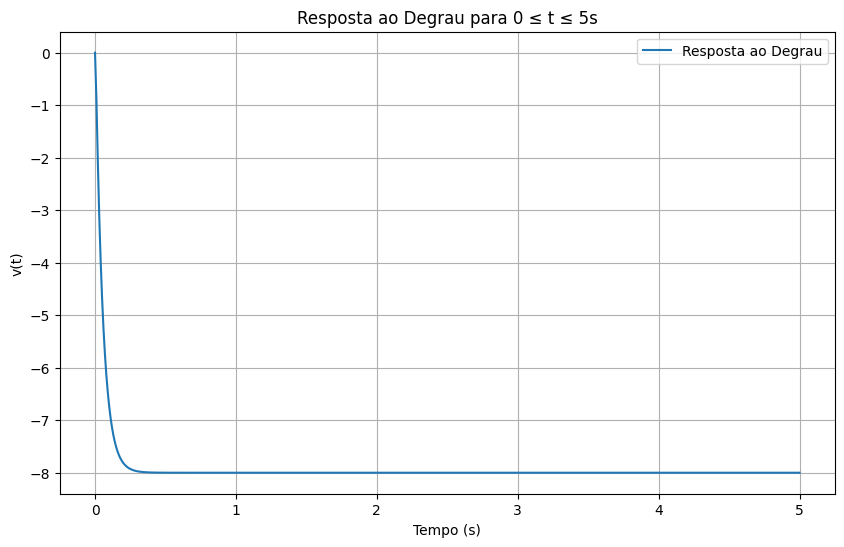

In [45]:
# Realizando a transformação inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)

# Convertendo a expressão simbólica para uma função numérica
v_t_func = lambdify(t, vt, 'numpy')

# Definindo o vetor de tempo de 0 a 5 segundos
t_vals = np.linspace(0, 5, 500)
v_t_vals = v_t_func(t_vals)

# Plotando a resposta ao degrau
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_t_vals, label='Resposta ao Degrau')
plt.title('Resposta ao Degrau para 0 ≤ t ≤ 5s')
plt.xlabel('Tempo (s)')
plt.ylabel('v(t)')
plt.grid(True)
plt.legend()
plt.show()


In [46]:

# Determinando o valor de regime permanente
lam_Vo_t = lambdify(t, vt)
t_vals= np.linspace(0,0.5, 1000)
Vo_vals= lam_Vo_t(t_vals)


In [47]:
valor_regime_permanente = vt.subs(t,2)
valor_regime_permanente

-8.00000000000000

In [48]:
t_10 = t_vals[np.where(np.isclose(-8*0.1, Vo_vals, atol=1e-1))][1]
t_90 = t_vals[np.where(np.isclose(-8*0.9, Vo_vals, atol=1e-2))][1]

t_10,t_90

(0.00950950950950951, 0.12462462462462462)

In [49]:
vt_10 = vt.subs(t,t_10)
vt_90 = vt.subs(t,t_90)

vt_10, vt_90

(-0.818972477207604, -7.20142465971472)